In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['minimum_nights_avg_ntm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: minimum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['minimum_nights_avg_ntm'].max()
Min = Mexico['minimum_nights_avg_ntm'].min()
Limites = [Min, Max]
Limites

[1.0, 70.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

69.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

4.397808970474906

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (1, 70, 16)
intervalos

array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ,
       51.6, 56.2, 60.8, 65.4, 70. ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['minimum_nights_avg_ntm'] = pd.cut ( x = Mexico ['minimum_nights_avg_ntm'], bins = intervalos, labels = categorias )
Mexico['minimum_nights_avg_ntm']

0               NaN
1               NaN
2        Categoria1
3        Categoria1
4               NaN
            ...    
26577    Categoria1
26578           NaN
26579           NaN
26580           NaN
26581    Categoria1
Name: minimum_nights_avg_ntm, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [12]:
table1 = freq_tbl(Mexico['minimum_nights_avg_ntm'])
table1

,minimum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Categoria1,13994,0.526446,0.884800
1,Categoria2,855,0.032165,0.938859
2,Categoria7,303,0.011399,0.958017
3,Categoria4,183,0.006884,0.969588
4,Categoria3,177,0.006659,0.980779
5,Categoria6,161,0.006057,0.990959
6,Categoria5,73,0.002746,0.995574
7,Categoria13,26,0.000978,0.997218
8,Categoria14,24,0.000903,0.998735
9,Categoria10,7,0.000263,0.999178


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,minimum_nights_avg_ntm,frequency
0,Categoria1,13994
1,Categoria2,855
2,Categoria7,303
3,Categoria4,183
4,Categoria3,177
5,Categoria6,161
6,Categoria5,73
7,Categoria13,26
8,Categoria14,24
9,Categoria10,7


In [17]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 150]
Filtro

,minimum_nights_avg_ntm,frequency
0,Categoria1,13994
1,Categoria2,855
2,Categoria7,303
3,Categoria4,183
4,Categoria3,177
5,Categoria6,161


In [18]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('minimum_nights_avg_ntm')
Filtro_index

,frequency
minimum_nights_avg_ntm,
Categoria1,13994
Categoria2,855
Categoria7,303
Categoria4,183
Categoria3,177
Categoria6,161


Text(0, 0.5, 'Frecuencia')

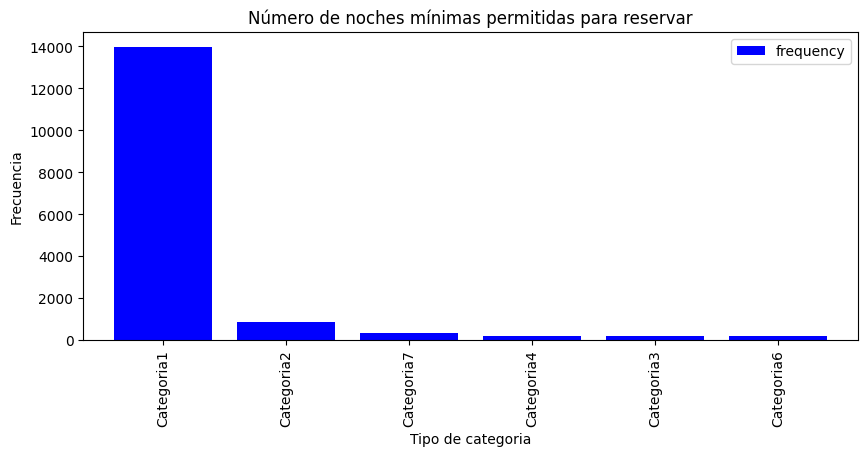

In [19]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches mínimas permitidas para reservar')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')